### ¿Qué es la Correlación?

La **correlación** es una medida estadística que expresa hasta qué punto dos variables están relacionadas linealmente. Es una herramienta común para describir relaciones simples sin hacer afirmaciones sobre causa y efecto.

#### Interpretación del Coeficiente de Pearson (r):
*   **r = 1:** Correlación positiva perfecta. Si una variable aumenta, la otra también en una proporción constante.
*   **r = 0:** No existe relación lineal entre las variables.
*   **r = -1:** Correlación negativa perfecta. Si una variable aumenta, la otra disminuye proporcionalmente.

En tus gráficos anteriores, un valor cercano a **0.85** indica una relación fuerte, mientras que valores cercanos a **0** indican que las variables son prácticamente independientes entre sí.

### Fórmula del Coeficiente de Correlación de Pearson

La fórmula para calcular el coeficiente de correlación ($r$) entre dos variables $x$ e $y$ es:

$$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}$$

Donde:
*   $x_i, y_i$: Son los valores individuales de las variables.
*   $\bar{x}, \bar{y}$: Son las medias aritméticas de $x$ e $y$.
*   El numerador representa la **covarianza**, mientras que el denominador es el producto de las **desviaciones estándar** de ambas variables.

### En Python
- With scipy.stats
  ```python
  from scipy.stats import pearsonr
  r,p = pearsonr(x, y)
  ```
- With pandas
  ```python
  import pandas as pd
  df = pd.DataFrame
  df.corr()
  ```
- With numpy
  ```python
  import numpy as np
  r = np.corrcoef(x, y)[0, 1
  ```

In [1]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

np.random.seed(42)

x = np.random.normal(0, 1, 100)

# y depende linealmente de x + ruido
y = 2*x + np.random.normal(0, 0.5, 100)

r, p = pearsonr(x, y)
print("Scipy Pearson r:", r)
print("p-value:", p)

df = pd.DataFrame({"x": x, "y": y})
print(df.corr())

r_numpy = np.corrcoef(x, y)
print("Numpy Pearson r:", r_numpy)

Scipy Pearson r: 0.9654943669720488
p-value: 4.538186359602375e-59
          x         y
x  1.000000  0.965494
y  0.965494  1.000000
Numpy Pearson r: [[1.         0.96549437]
 [0.96549437 1.        ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def correlation(x,y, x_label, y_label):
  m, b = np.polyfit(x, y, 1)
  plt.scatter(x, y)
  plt.plot(x, m*x + b, color = 'r')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  r = np.corrcoef(x, y)[0, 1]
  plt.title(f'Scatter plot (Pearson r = {r:.2f})')
  plt.show()

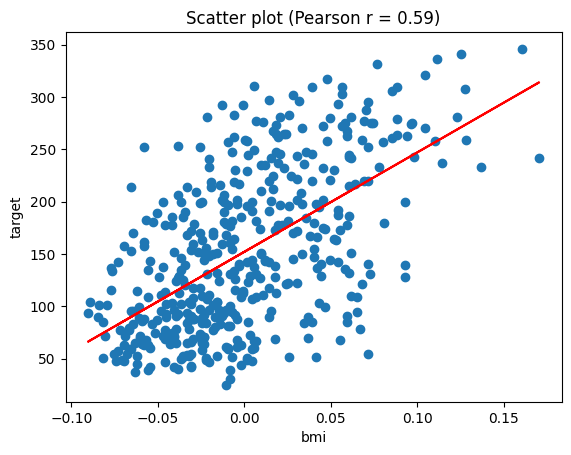

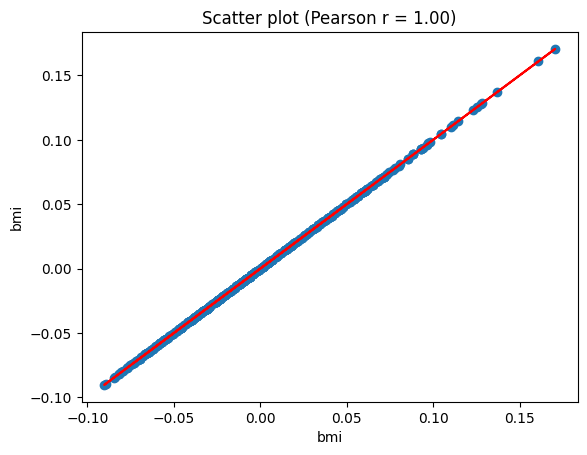

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
# Calculate correlation of features with the target variable
correlations = df.corr()['target'].sort_values(ascending=False)

# print("Correlation of independent variables with the target variable:")
# display(correlations)

y = df['target']
x = df['bmi']

correlation(x, y, 'bmi', 'target')

correlation(x, x, 'bmi', 'bmi')


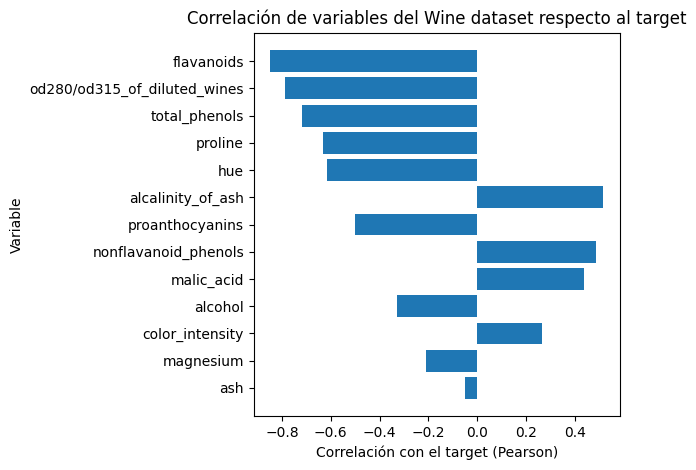

flavanoids                     -0.847498
od280/od315_of_diluted_wines   -0.788230
total_phenols                  -0.719163
proline                        -0.633717
hue                            -0.617369
alcalinity_of_ash               0.517859
proanthocyanins                -0.499130
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
alcohol                        -0.328222
color_intensity                 0.265668
magnesium                      -0.209179
ash                            -0.049643
dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

data = load_wine()


# Crear DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Calcular correlación de Pearson de cada variable con el target
correlations = X.apply(lambda col: np.corrcoef(col, y)[0, 1])

# Ordenar por valor absoluto de correlación
correlations_sorted = correlations.reindex(
    correlations.abs().sort_values(ascending=False).index
)

# Graficar
plt.figure()
plt.barh(correlations_sorted.index, correlations_sorted.values)
plt.xlabel("Correlación con el target (Pearson)")
plt.ylabel("Variable")
plt.title("Correlación de variables del Wine dataset respecto al target")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Mostrar valores numéricos
print(correlations_sorted)